# Practica 1: Aprendizaje automatico
## Parte 3: Regresión

Grupo Lab: 06 <br>
Daniel Alfaro Miranda e Ismail Azizi Gonzalez

### Conjunto de datos: PIB de países
El conjunto describe para cada país, datos territoriales y socioeconómicos como area, densidad de población, alfabetización, número de telefonos por cada 1000, etc.<br> El objetivo del análisis es consegir un pedictor por regresión para el PIB de los países.

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer="countries.csv", index_col=0) 
df = df.drop(['Region'], axis=1)
df = df.dropna(axis=0)

print('Tipos de las variables:')
pd.DataFrame({k: [v.name] for k, v in df.dtypes.to_dict().items()}, columns=df.columns.to_list(), index=['Types']).transpose()

Tipos de las variables:


,Types
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64
GDP (USD per capita),float64
Literacy (%),float64
Phones (per 1000),float64
Arable (%),float64


In [2]:
print('Estadísticos descriptivos:')
df.describe().transpose()

Estadísticos descriptivos:


,count,mean,std,min,25%,50%,75%,max
Population,179.0,3.421415e+07,1.317639e+08,13477.000,1.188580e+06,6940432.000,2.086014e+07,1.313974e+09
Area (sq. mi.),179.0,5.641830e+05,1.395657e+06,28.000,1.991500e+04,118480.000,4.964410e+05,9.631420e+06
Pop. Density (per sq. mi.),179.0,2.948050e+02,1.379353e+03,1.800,2.680000e+01,66.900,1.647000e+02,1.618300e+04
Coastline (coast/area ratio),179.0,1.649520e+01,7.397760e+01,0.000,9.000000e-02,0.630,5.355000e+00,8.706600e+02
Net migration,179.0,-2.065363e-01,4.751216e+00,-20.990,-1.315000e+00,0.000,3.950000e-01,2.306000e+01
Infant mortality (per 1000 births),179.0,3.889816e+01,3.535300e+01,2.290,9.990000e+00,24.310,6.460500e+01,1.630700e+02
GDP (USD per capita),179.0,9.125698e+03,9.644123e+03,500.000,1.800000e+03,5100.000,1.295000e+04,3.780000e+04
Literacy (%),179.0,8.194413e+01,1.983754e+01,17.600,6.995000e+01,90.900,9.780000e+01,1.000000e+02
Phones (per 1000),179.0,2.081520e+02,2.101219e+02,0.200,2.710000e+01,137.100,3.350000e+02,8.980000e+02
Arable (%),179.0,1.400045e+01,1.315240e+01,0.000,3.675000e+00,10.530,2.000000e+01,6.211000e+01


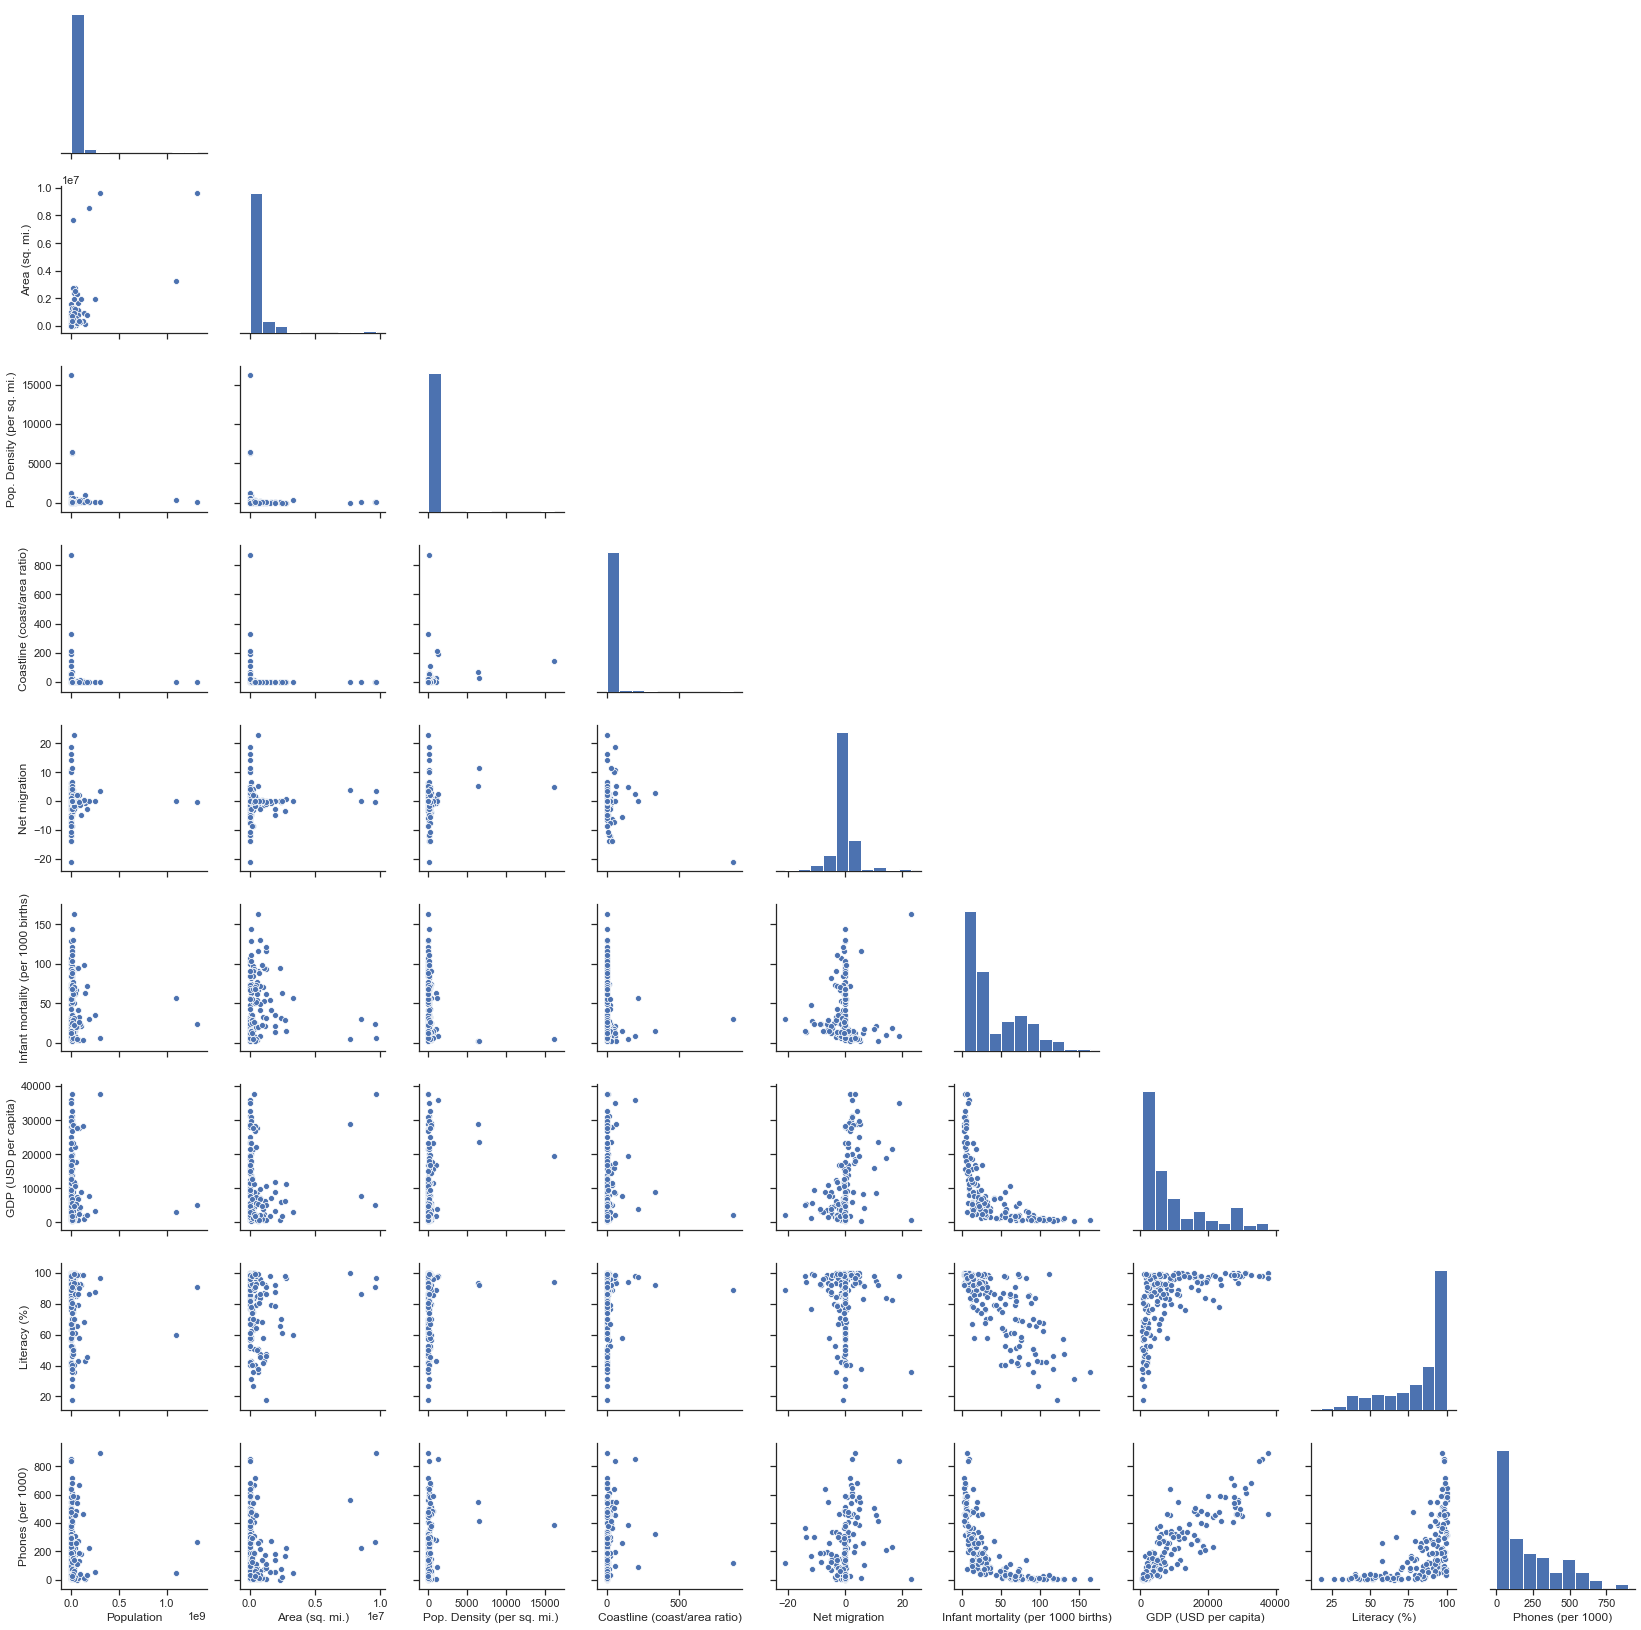

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, x_vars=df.columns[0:9] ,y_vars=df.columns[0:9] ,corner=True)

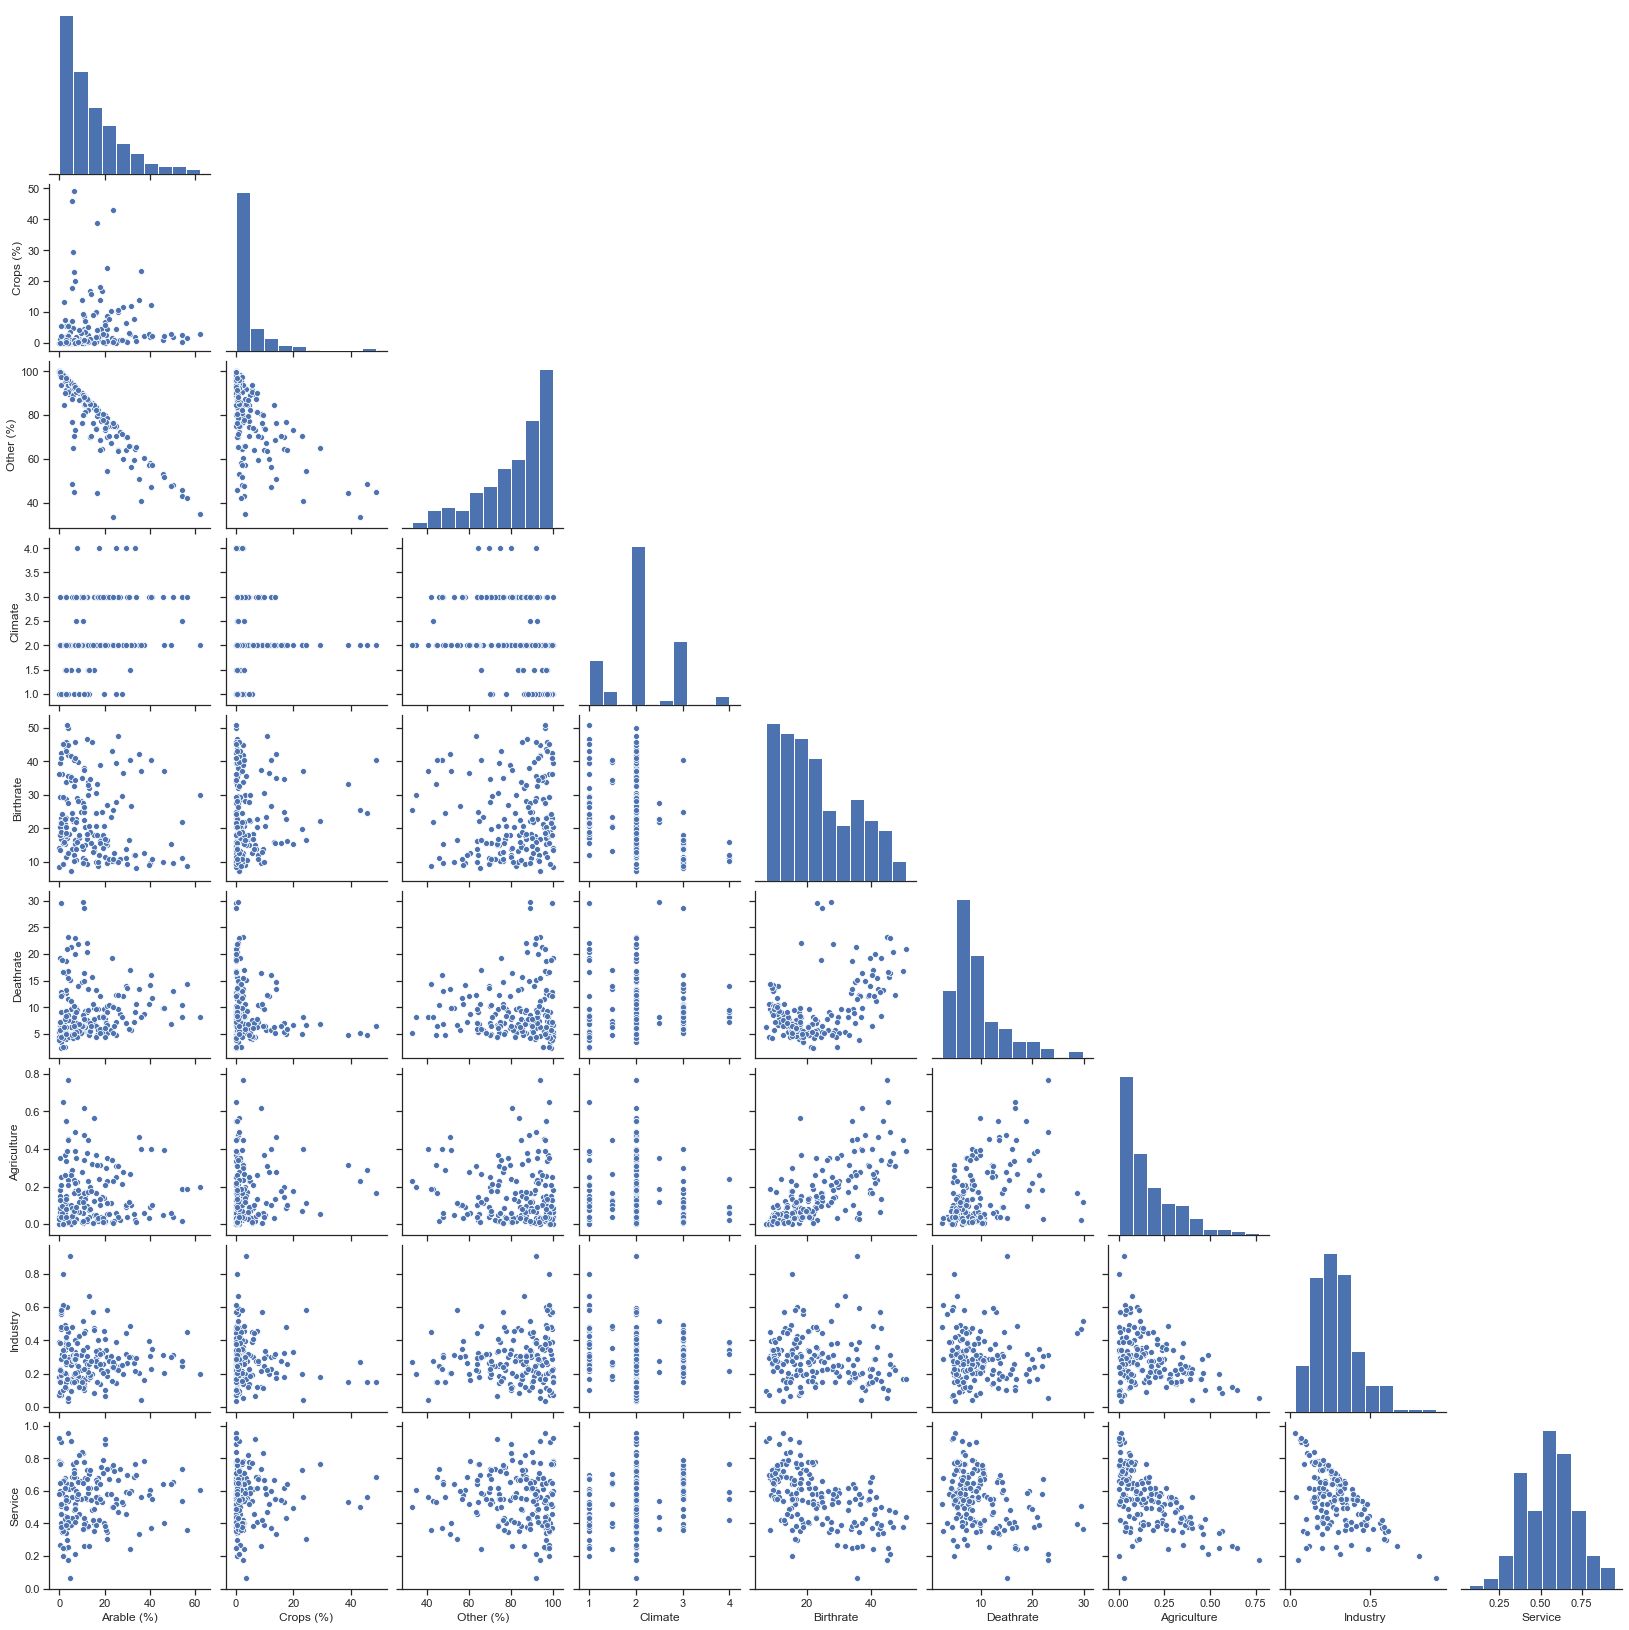

In [4]:
sns.pairplot(df, x_vars=df.columns[9:18] ,y_vars=df.columns[9:18] ,corner=True)

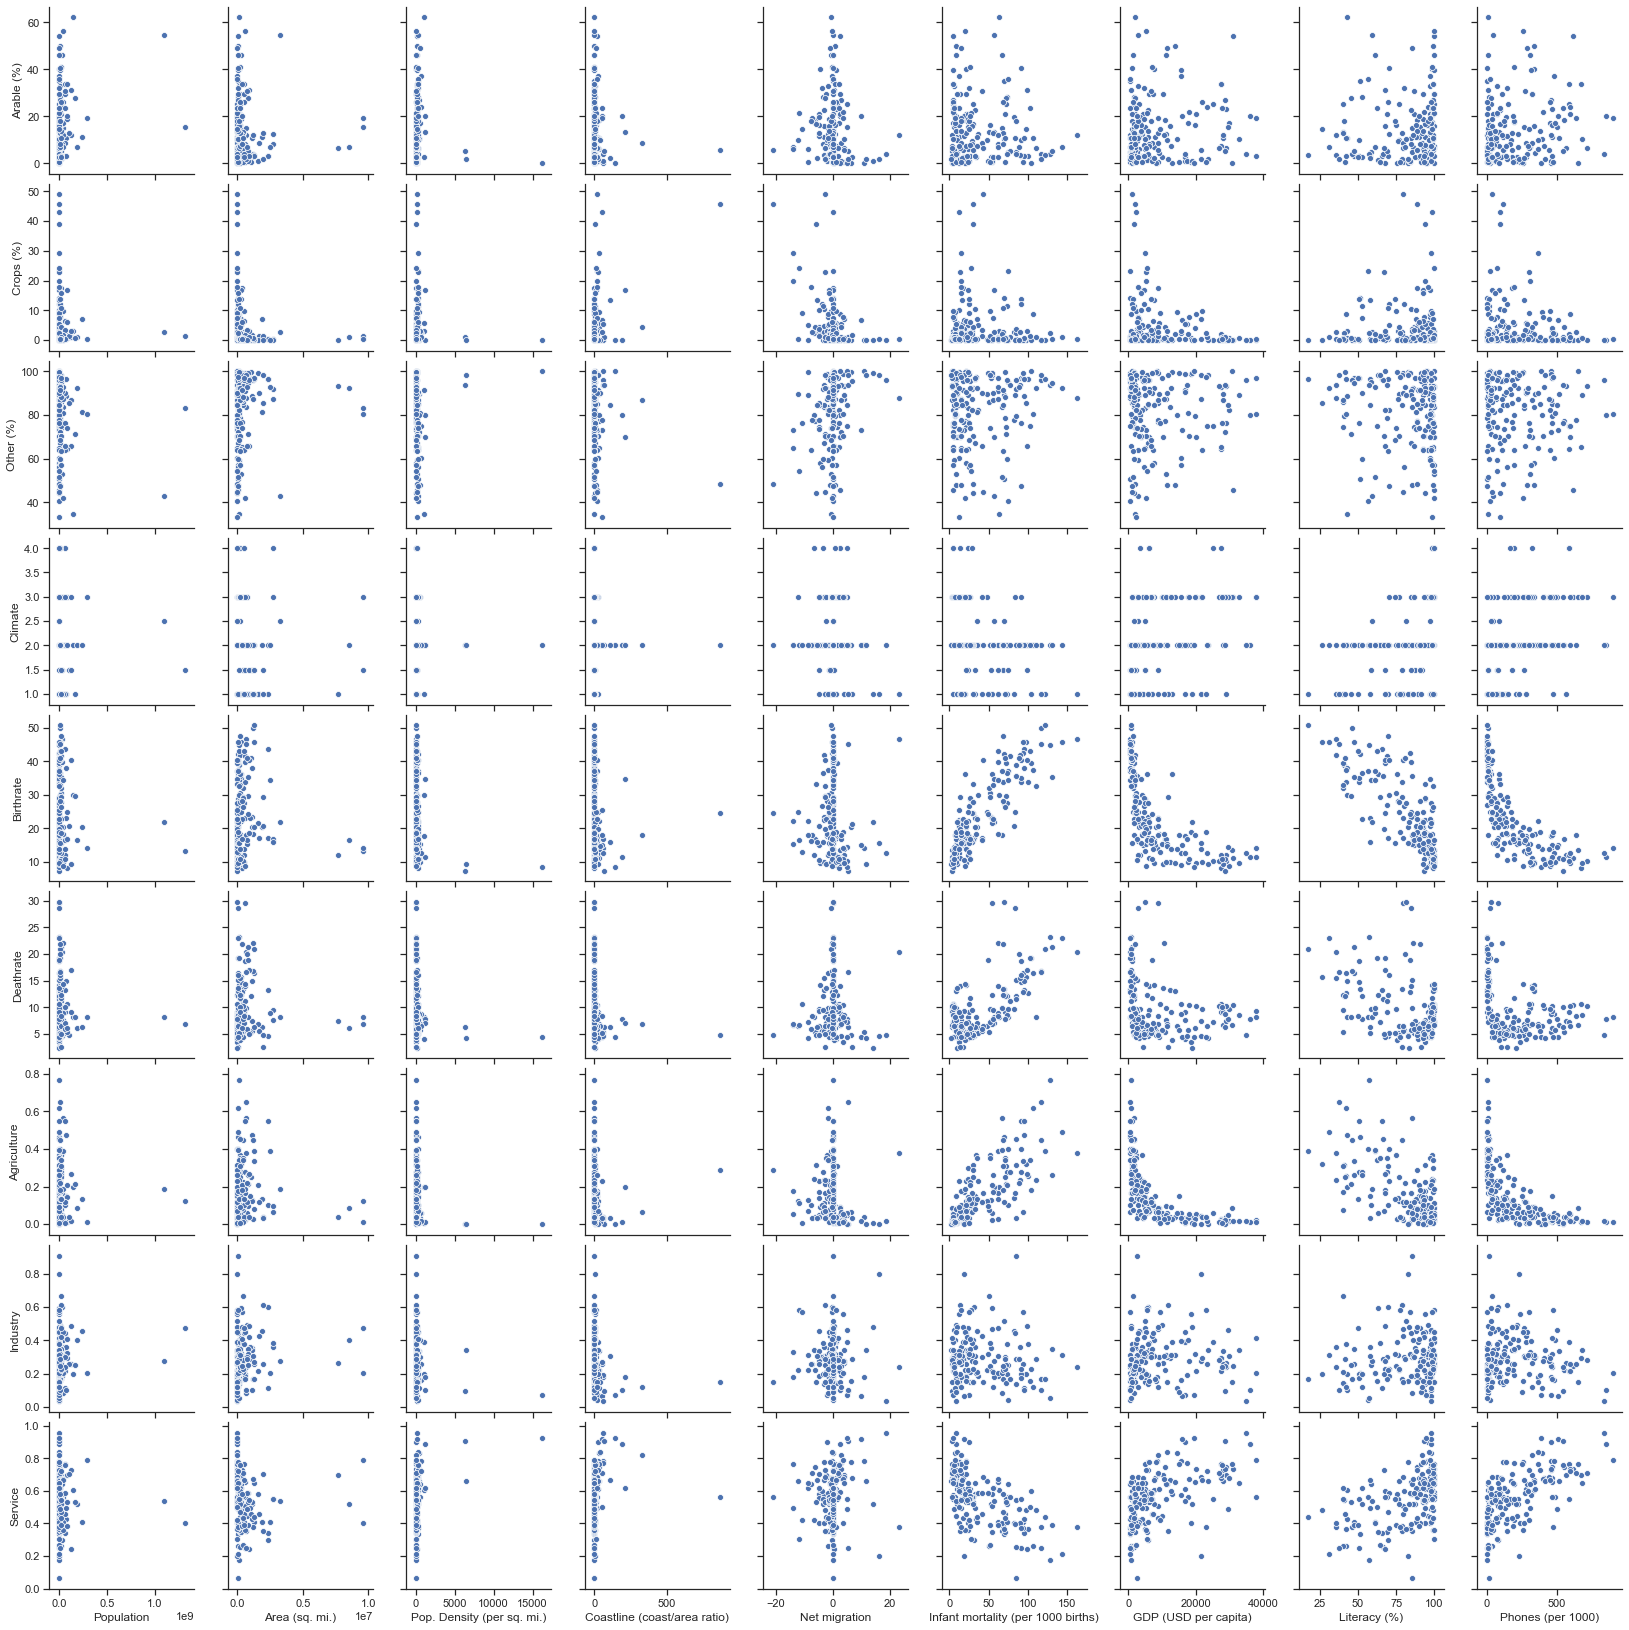

In [5]:
sns.pairplot(df, x_vars=df.columns[0:9] ,y_vars=df.columns[9:18])

### Conclusiones del análisis:
Como se puede ver en las gráficas, hay variables que no aportan nada al predictor como población, area, densidad, area de costa y saldo migratorio, ya que hay paises pequeños o con poca poblacion que tienen un alto PIB y paises grandes con menos, por lo que su coeficiente de correlación sera muy bajo.<br> El clima también pertenece a este conjunto, como se ve en las gráficas no tiene suficiente correlacion con ninguna, lo cual tiene sentido al ser un fenómeno aleatorio en su mayor grado. <br>
Para las demás hay suficiente correlación con el PIB, ya sea directa o inversa, de entre las que destacan alfabetizacion y mortalidad infantil o industria con agricultura o servicios.

In [6]:
correl=df.corr()
correl['GDP (USD per capita)']

Population                           -0.033618
Area (sq. mi.)                        0.068356
Pop. Density (per sq. mi.)            0.190122
Coastline (coast/area ratio)          0.035815
Net migration                         0.378790
Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Arable (%)                            0.046465
Crops (%)                            -0.207844
Other (%)                             0.066445
Climate                               0.360567
Birthrate                            -0.658795
Deathrate                            -0.247562
Agriculture                          -0.616919
Industry                              0.032855
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

In [7]:
correl[abs(correl['GDP (USD per capita)']) > 0.3]['GDP (USD per capita)']

Net migration                         0.378790
Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Climate                               0.360567
Birthrate                            -0.658795
Agriculture                          -0.616919
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

### Filtrado de variables
Para el filtrado se ha fijado un valor de coeficiente de correlación mínimo de |0.5|, para eliminar al menos aquellas ya mencionadas anteriormente con poco sentido para el predictor, como el clima (0.36).
Las que quedan son las siguientes:

In [8]:
filteredDf = df.drop([k for k, v in correl[abs(correl['GDP (USD per capita)']) < 0.5]['GDP (USD per capita)'].to_dict().items()], axis=1)
correl[abs(correl['GDP (USD per capita)']) >= 0.5]['GDP (USD per capita)']

Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Birthrate                            -0.658795
Agriculture                          -0.616919
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

In [9]:
filteredDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Infant mortality (per 1000 births),179.0,38.898156,35.353003,2.290,9.9900,24.310,64.6050,163.070
GDP (USD per capita),179.0,9125.698324,9644.123141,500.000,1800.0000,5100.000,12950.0000,37800.000
Literacy (%),179.0,81.944134,19.837537,17.600,69.9500,90.900,97.8000,100.000
Phones (per 1000),179.0,208.151955,210.121875,0.200,27.1000,137.100,335.0000,898.000
Birthrate,179.0,23.067486,11.287207,7.290,13.8900,20.460,32.3150,50.730
Agriculture,179.0,0.156905,0.151343,0.000,0.0390,0.101,0.2330,0.769
Service,179.0,0.554508,0.165670,0.062,0.4245,0.559,0.6685,0.954


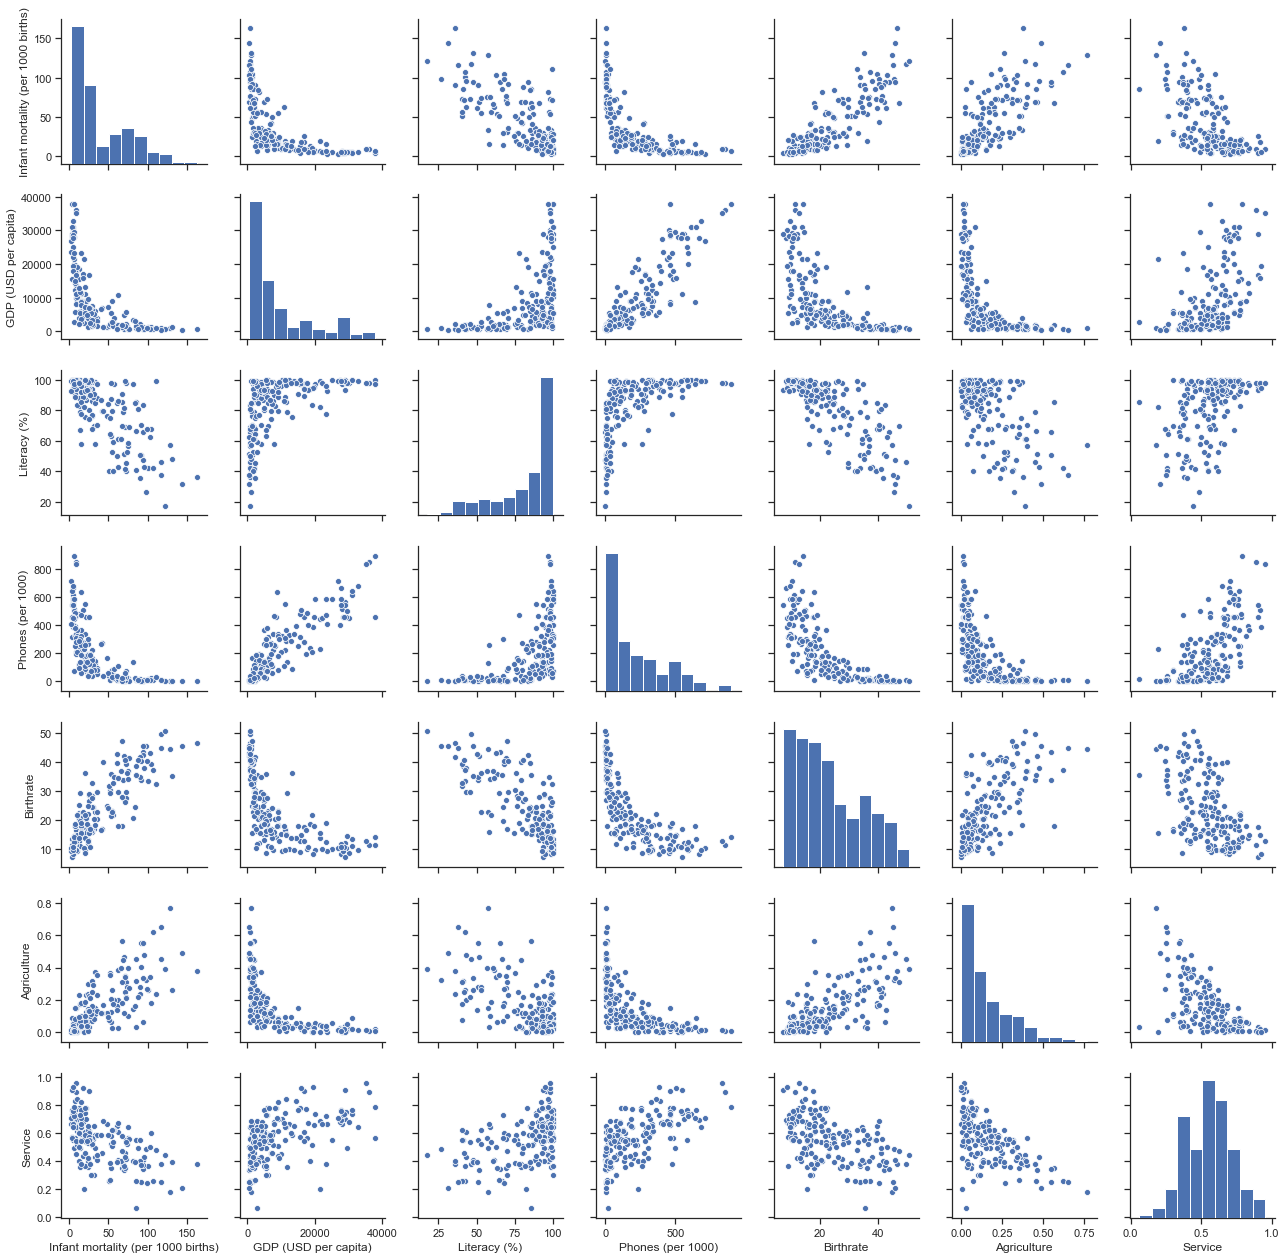

In [10]:
sns.pairplot(filteredDf)

### Reescalado de variables:
El reescalado de variables no es necesario para utilizar el perceptrón multicapa, puesto que aún sin normalizar, teniendo algunas variables mayor peso que otras en la representación, el perceptrón ajustará los valores de los pesos a cada entrada segun su importancia. El hecho de reescalar las variables ayuda a que ajuste los pesos de una forma más rápida, al empezar todos en el mismo rango con la misma importancia. En este problema estandarizaremos las variables.

In [11]:
from sklearn.preprocessing import StandardScaler

dfY = filteredDf.drop([k for k, v in filteredDf.to_dict().items() if k != 'GDP (USD per capita)'], axis=1)
dfX = filteredDf.drop('GDP (USD per capita)', axis=1)

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(dfX.values)
xdataScaled=scaler_x.transform(dfX.values)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(dfY.values)
ydataScaled=scaler_y.transform(dfY.values)


### Eleccion de MLP y valor optimo de regularización:

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

#Rango de parametro de regularizacion 0.1 a 0.000001, penalizacion por pesos grandes
regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean1=[]
cv_scores_std1=[]
cv_scores_mean2=[]
cv_scores_std2=[]

for regul_param in regul_param_range:
    #Capa oculta de 200 neuronas, batch_size auto = min(200, numero de muestras = 179)
    mlp1=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    #2 capas ocultas de 50 neuronas cada una
    mlp2=MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    
    # Puntuacion en MSE negativo en 5 folds
    scores1 = cross_val_score(mlp1, xdataScaled, ydataScaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    scores2 = cross_val_score(mlp2, xdataScaled, ydataScaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean1.append(scores1.mean())
    cv_scores_std1.append(scores1.std())
    
    cv_scores_mean2.append(scores2.mean())
    cv_scores_std2.append(scores2.std())
    

In [13]:
import matplotlib.pyplot as plt

def printRegulationScores(cv_scores_mean, cv_scores_std, regul_param_range, title):
    #Media de puntuacion 
    plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

    #Desviación típica
    lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
    upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
    plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

    # Creamos el gráfico
    plt.title(title)
    plt.xlabel("Regularización 10^X"), plt.ylabel("Negative MSE"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

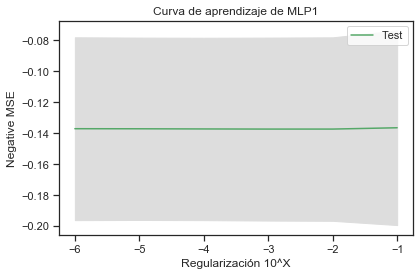

In [14]:
printRegulationScores(cv_scores_mean1, cv_scores_std1, regul_param_range, "Curva de aprendizaje de MLP1")

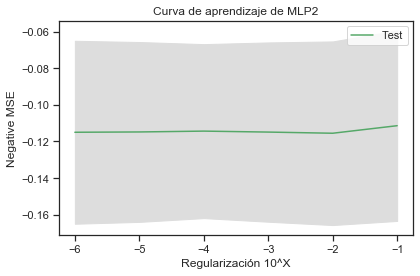

In [15]:
printRegulationScores(cv_scores_mean2, cv_scores_std2, regul_param_range, "Curva de aprendizaje de MLP2")

El mejor valor de regularizacion para los dos MLP es -1, siendo en el segundo (dos capas ocultas con 50 neuronas cada una) mejor que el primero por muy poco (0.02). <br>La diferencia podria ser porque al tener el segundo mas capas da una representacion en el hiperplano mas ajustada a los valores de entrenamiento.<br> En cualquier caso al ser la diferencia en regulacion despreciable, se prefiere al segundo por simplicidad (menos neuronas) y facilidad de calculo (por tener mas capas).

### Entrenamiento final y representacion de predicciones:

In [16]:
from sklearn.model_selection import cross_val_predict


mlp= MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', alpha=10**-1, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    

predicts_scaled = cross_val_predict(mlp, xdataScaled, ydataScaled.ravel(), cv=5)
#scores = cross_val_score(mlp, xdataScaled, ydataScaled.ravel(), cv=5, scoring='neg_root_mean_squared_error')


# Pedicciones escaladas
predicts=scaler_y.inverse_transform(predicts_scaled)


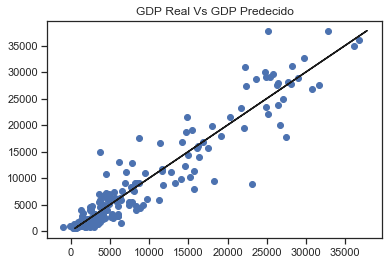

In [17]:
ax2 = plt.axes()

# Grafica de dispersion de valores predecidos/valores reales
ax2.scatter(predicts, dfY.values) 
# Referencia de prediccion perfecta
ax2.plot(dfY.values, dfY.values, color='k') 

plt.title('GDP Real Vs GDP Predecido')
plt.show()

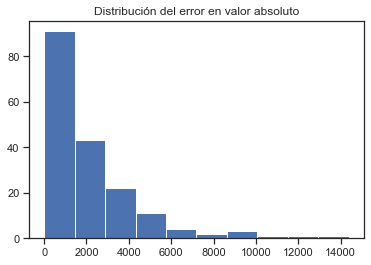

In [18]:
#Histograma de errores en valor absoluto
plt.axes().hist(np.abs(dfY.values.ravel() - predicts))
plt.title('Distribución del error en valor absoluto')
plt.show()

In [19]:
#dfPred = pd.DataFrame({'Predicts': predicts.tolist(), 'Real': dfY.values.ravel().tolist()})
resultDf = filteredDf.drop('GDP (USD per capita)', axis=1)
resultDf['Real GDP'] = dfY.values.ravel().tolist()
resultDf['Predicted GDP'] = predicts.tolist()

In [20]:
resultDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Infant mortality (per 1000 births),179.0,38.898156,35.353003,2.290000,9.990000,24.310000,64.605000,163.070000
Literacy (%),179.0,81.944134,19.837537,17.600000,69.950000,90.900000,97.800000,100.000000
Phones (per 1000),179.0,208.151955,210.121875,0.200000,27.100000,137.100000,335.000000,898.000000
Birthrate,179.0,23.067486,11.287207,7.290000,13.890000,20.460000,32.315000,50.730000
Agriculture,179.0,0.156905,0.151343,0.000000,0.039000,0.101000,0.233000,0.769000
Service,179.0,0.554508,0.165670,0.062000,0.424500,0.559000,0.668500,0.954000
Real GDP,179.0,9125.698324,9644.123141,500.000000,1800.000000,5100.000000,12950.000000,37800.000000
Predicted GDP,179.0,9132.368099,9237.162935,-1065.238201,2259.063682,5207.710121,14608.744326,36744.118549


In [21]:
resultDf[resultDf.duplicated('Real GDP', keep=False)].sort_values('Real GDP').head(6)

,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service,Real GDP,Predicted GDP
Country,,,,,,,,
Somalia,116.70,37.8,11.3,45.13,0.650,0.250,500.0,432.716286
Sierra Leone,143.64,31.4,4.0,45.76,0.490,0.210,500.0,263.089743
Burundi,69.29,51.6,3.4,42.22,0.463,0.334,600.0,656.677182
Malawi,103.32,62.7,7.9,43.13,0.342,0.499,600.0,633.786278
Afghanistan,163.07,36.0,3.2,46.60,0.380,0.380,700.0,-1065.238201
Congo. Repub. of the,93.86,83.8,3.7,42.57,0.062,0.369,700.0,588.874293


In [22]:
resultDf[resultDf.duplicated('Real GDP', keep=False)].sort_values('Real GDP')

,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service,Real GDP,Predicted GDP
Country,,,,,,,,
Somalia,116.70,37.8,11.3,45.13,0.650,0.250,500.0,432.716286
Sierra Leone,143.64,31.4,4.0,45.76,0.490,0.210,500.0,263.089743
Burundi,69.29,51.6,3.4,42.22,0.463,0.334,600.0,656.677182
Malawi,103.32,62.7,7.9,43.13,0.342,0.499,600.0,633.786278
Afghanistan,163.07,36.0,3.2,46.60,0.380,0.380,700.0,-1065.238201
...,...,...,...,...,...,...,...,...
Barbados,12.50,97.4,481.9,12.71,0.060,0.780,15700.0,16111.255257
France,4.26,99.0,586.4,11.99,0.022,0.764,27600.0,26336.977990
Germany,4.16,99.0,667.9,8.25,0.009,0.695,27600.0,31694.164468


### Conclusiones:
En general el predictor funciona bien, como puede apreciarse en los estadísticos descriptivos de las dos variables y en la grafica de dispersión, la mayoría de errores se centran en diferencias entre 0 y 3500 USD per capita. <br><br>
Existen dos casos en los que el valor predecido es negativo, lo cual ocurre porque, siendo paises con un PIB bajo de por si, el valor de sus variables se sale de lo normal para esos PIBs bajos y se infraestima demasiado.<br> En general se suele infraestimar y sobreestimar mucho por la variable de telefonos, que apesar de tener la mejor correlacion lineal con la variable del PIB, no es suficiente para determinar esta. Puede haber países con alto PIB, cuyos habitantes decidan emplear su dinero en bienes o servicios distintos a los telefonos o viceversa, los cuales, no se estan registrando como variables.<br>
Otro caso de infraestimación es en la variable de alfabetización, en el caso de Afghanistan se da hasta un valor negativo por tener muy baja alfabetización, lo cual puede ser indicativo de un país con menos capacidad para explotar su economía, pero no siempre es el caso. Esto es indicativo de que el predictor no ha sobreaprendido al dar una estimación general.